#**Read me**

The focus of this project is to use unsupervised ML, so a labeled galaxy dataset was not sought. The images (jpg) were obtained from the [Zoo Galaxy](https://data.galaxyzoo.org/#section-21) platform, corresponding to Galaxy Zoo 2 ([images_gz2.zip](https://zenodo.org/records/3565489#.Y3vFKS-l0eY)).  

A total of 10,000 images (jpg) were randomly selected for training and 10,000 (jpg) for testing. However, handling 20,000 separate files is impractical, so it is necessary to store the images in a more portable format.  

Nevertheless, [direct access](https://drive.google.com/drive/folders/19dFtIuN5AJwEbsUqUL_6RZT1T1TBEMnY?usp=drive_link) to the jpg images used in the project will be maintained.  

This code demonstrates how to convert the 20,000 ".jpg" images into ".h5" files, organizing them into two separate files for training and testing, as well as how to save them to Google Drive.

# Set up

## Package

In [ ]:
# Mount Google Drive to access and store files
# Comment out this cell if running the script locally

from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # Force remount to ensure access


Mounted at /content/drive


In [ ]:
# Import essential libraries for image processing, timing, and file handling

import os  # For file path operations and directory handling
import h5py  # For creating and working with HDF5 files (efficient storage format)
import time  # To measure execution time for performance tracking
from PIL import Image  # For loading and handling image files
import numpy as np  # For numerical operations and array manipulation
import matplotlib.pyplot as plt  # For plotting and visualizing data/images


#Directories

In [ ]:
# Define basic configuration for data usage
TYPE_DATA = ['Train', 'Test']  # Specifies the dataset categories (training and testing)

# Paths for storing data
ROOT_JPGS = '/content/drive/MyDrive/Practicas_Profesionales/Data/JPGs'  # Directory for storing JPG image files
ROOT_H5S = '/content/drive/MyDrive/Practicas_Profesionales/Data/H5s'  # Directory for storing HDF5 (H5) data files


#Conver JPG to H5

In [ ]:
indx = 1  # Index to select the dataset type (0 = 'Train', 1 = 'Test')

# Construct the path to the selected dataset (e.g., training images)
root_data = os.path.join(ROOT_JPGS, TYPE_DATA[indx]+'/images')

# List all JPG images in the selected directory
imgs_jpg = os.listdir(root_data)


In [ ]:
cuenta = 0  # Counter to track the number of processed images

print(f'Data extracted: {TYPE_DATA[indx]}')  # Display the dataset being processed
start_time = time.time()  # Start time for performance measurement

# Iterate through all images in the selected dataset
for i in range(len(imgs_jpg)):

  # Extract the image name without the file extension
  name = imgs_jpg[i][:-4]

  # Define the corresponding HDF5 file path
  name_fileh5 = os.path.join(ROOT_H5S, TYPE_DATA[indx]) + '/' + name + '.h5'

  # Get the full path to the current image
  root_img = os.path.join(root_data, imgs_jpg[i])

  # Open and convert the image to a NumPy array
  with Image.open(root_img) as img_jpg:
      img_array = np.array(img_jpg)

  # Save the image data in an HDF5 file with compression
  with h5py.File(name_fileh5, 'w') as f:
      f.create_dataset("number", data=np.array(int(name), dtype=np.int32))  # Store image number
      f.create_dataset("galaxy", data=img_array, compression="gzip", compression_opts=9)  # Store image data with compression

  cuenta += 1  # Update counter

  # Display progress every 250 images
  if cuenta % 250 == 0:
      delta_t = time.time() - start_time  # Calculate elapsed time
      print(f'Progress: {np.round(cuenta / len(imgs_jpg) * 100, 4)}%\nExecution Time: {delta_t:.2f} s\n')


Data extracted: Test
Progress: 2.5%
Execution Time: 368.33 s

Progress: 5.0%
Execution Time: 393.60 s

Progress: 7.5%
Execution Time: 419.91 s

Progress: 10.0%
Execution Time: 445.53 s

Progress: 12.5%
Execution Time: 469.83 s

Progress: 15.0%
Execution Time: 499.24 s

Progress: 17.5%
Execution Time: 523.77 s

Progress: 20.0%
Execution Time: 548.88 s

Progress: 22.5%
Execution Time: 573.70 s

Progress: 25.0%
Execution Time: 598.43 s

Progress: 27.5%
Execution Time: 623.16 s

Progress: 30.0%
Execution Time: 647.39 s

Progress: 32.5%
Execution Time: 672.23 s

Progress: 35.0%
Execution Time: 696.85 s

Progress: 37.5%
Execution Time: 720.78 s

Progress: 40.0%
Execution Time: 745.30 s

Progress: 42.5%
Execution Time: 768.78 s

Progress: 45.0%
Execution Time: 792.97 s

Progress: 47.5%
Execution Time: 816.46 s

Progress: 50.0%
Execution Time: 841.19 s

Progress: 52.5%
Execution Time: 865.58 s

Progress: 55.0%
Execution Time: 889.81 s

Progress: 57.5%
Execution Time: 914.23 s

Progress: 60.0%


##Check Files saved

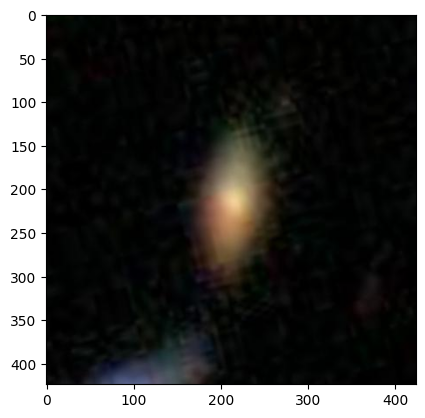

In [ ]:
# Define the directory containing the HDF5 files for the selected dataset (Train or Test)
data_dir = os.path.join(ROOT_H5S, TYPE_DATA[indx])

# Select a specific HDF5 file (in this case, the 9th file in the list)
cheack_file = os.listdir(data_dir)[8]  # Possible typo in variable name: "cheack_file" -> "check_file"

# Construct the full path to the selected HDF5 file
name_file = os.path.join(data_dir, cheack_file)

# Start timing the file reading process
start_time = time.time()

# Open and read the selected HDF5 file
with h5py.File(name_file, 'r') as f:
    imagenes = f["galaxy"][:]  # Load image data
    imagenes_nombres = f["number"][()]  # Load image identifier

plt.imshow(imagenes)

#File compression

##H5 Files

In [ ]:
# Compress all .h5 files into a single archive
# This process is done separately for both Train and Test datasets

for indx in [0,1]: # Index to select the dataset type (0 = 'Train', 1 = 'Test')

  # Define the directory containing the HDF5 files for the selected dataset
  data_dir = os.path.join(ROOT_H5S, TYPE_DATA[indx])

  # Define the output compressed file path (Train.tar.gz or Test.tar.gz)
  tar_file = os.path.join(ROOT_H5S, f"{TYPE_DATA[indx]}.tar.gz")

  # Create a compressed tar archive (.tar.gz) containing all files in the selected directory
  !tar -czvf "{tar_file}" -C "{data_dir}" .

Se truncaron las últimas líneas 5000 del resultado de transmisión.
tar: ./190536.h5: file changed as we read it
./74024.h5
tar: ./74024.h5: file changed as we read it
./23856.h5
tar: ./23856.h5: file changed as we read it
./187676.h5
tar: ./187676.h5: file changed as we read it
./172357.h5
tar: ./172357.h5: file changed as we read it
./11657.h5
tar: ./11657.h5: file changed as we read it
./139033.h5
tar: ./139033.h5: file changed as we read it
./292777.h5
tar: ./292777.h5: file changed as we read it
./166061.h5
tar: ./166061.h5: file changed as we read it
./266761.h5
tar: ./266761.h5: file changed as we read it
./4464.h5
tar: ./4464.h5: file changed as we read it
./38188.h5
tar: ./38188.h5: file changed as we read it
./126199.h5
tar: ./126199.h5: file changed as we read it
./62907.h5
tar: ./62907.h5: file changed as we read it
./88790.h5
tar: ./88790.h5: file changed as we read it
./132282.h5
tar: ./132282.h5: file changed as we read it
./32970.h5
tar: ./32970.h5: file changed as we re

#JPG Files

In [ ]:
!apt-get install pigz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pigz is already the newest version (2.6-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
# Compress JPG images from both Train and Test datasets to save storage space in Google Drive

ROOT_JPGS = '/content/drive/MyDrive/Practicas_Profesionales/Data/JPGs'

# Define the path for the compressed archive containing both Train and Test image folders
tar_dir = os.path.join(ROOT_JPGS, 'Train&test_jpg.tar.gz')

# Create a highly compressed .tar.gz archive using pigz for better compression speed and efficiency
!tar -cf - -C "/content/drive/MyDrive/Practicas_Profesionales/Data/JPGs" Train Test | pigz -9 -p 4 > "/content/drive/MyDrive/Practicas_Profesionales/Data/JPGs/Train&test_jpg.tar.gz"


Se truncaron las últimas líneas 5000 del resultado de transmisión.
tar: Test/images/218588.jpg: file changed as we read it
tar: Test/images/10590.jpg: file changed as we read it
tar: Test/images/210326.jpg: file changed as we read it
tar: Test/images/188667.jpg: file changed as we read it
tar: Test/images/82944.jpg: file changed as we read it
tar: Test/images/208067.jpg: file changed as we read it
tar: Test/images/84308.jpg: file changed as we read it
tar: Test/images/33956.jpg: file changed as we read it
tar: Test/images/236558.jpg: file changed as we read it
tar: Test/images/103867.jpg: file changed as we read it
tar: Test/images/45629.jpg: file changed as we read it
tar: Test/images/93426.jpg: file changed as we read it
tar: Test/images/221069.jpg: file changed as we read it
tar: Test/images/30463.jpg: file changed as we read it
tar: Test/images/22410.jpg: file changed as we read it
tar: Test/images/224789.jpg: file changed as we read it
tar: Test/images/88641.jpg: file changed as w